In [2]:
#Fetching Dataset
from sklearn.datasets import fetch_openml


C:\Users\Tarun Ahuja\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
mnist=fetch_openml("mnist_784")

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [5]:
x,y=mnist['data'],mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [9]:
somedigit=x[3601] 
some_digit_image=somedigit.reshape(28,28) #lets reshape and plot it

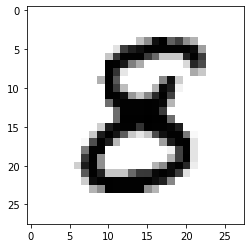

In [10]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [11]:
y[36000]

'9'

In [12]:
x_train,x_test=x[:6000],x[6000:7000]

In [13]:
y_train,y_test=y[:6000],y[6000:7000]

In [16]:
import numpy as np
shuffle_index=np.random.permutation(6000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [17]:
# Creatin a 2 detector

In [18]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [19]:
y_train

array([6, 3, 0, ..., 3, 2, 0], dtype=int8)

In [20]:
y_test_2

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,

In [21]:
from sklearn.linear_model import LogisticRegression

C:\Users\Tarun Ahuja\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
clf=LogisticRegression(tol=0.1)

In [23]:
clf.fit(x_train,y_train_2)

C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.1, verbose=0, warm_start=False)

In [25]:
clf.predict([somedigit])

array([False])

In [28]:
from sklearn.model_selection import cross_val_score

a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
a.mean()

0.972332078291353

In [33]:
# accuracy and score is not only way to judge, we should look for precision and recall value

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_2,cv=3)

C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
y_train_pred

array([False, False, False, ..., False,  True, False])

In [35]:
# Calculating confusion metrics i.e precision and recall values
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_pred)

array([[5359,   60],
       [ 106,  475]], dtype=int64)

In [36]:
#ideal confusion_matrix
confusion_matrix(y_train_2,y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

In [37]:
#precision and recall
from sklearn.metrics import precision_score,recall_score

In [38]:
precision_score(y_train_2,y_train_pred)

0.8878504672897196

In [39]:
recall_score(y_train_2,y_train_pred)

0.8175559380378657

In [40]:
# F1 score
from sklearn.metrics import  f1_score

In [41]:
f1_score(y_train_2,y_train_pred)

0.8512544802867383

In [53]:
# Precision rcall curve
from sklearn.metrics import precision_recall_curve

In [54]:
y_scores=cross_val_predict=cross_val_predict(clf,x_train,y_train_2,cv=3,method="decision_function")

C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
precisions,recalls,thresholds=precision_recall_curve(y_train_2,y_scores)

In [60]:
precisions

array([0.10904655, 0.10887929, 0.10889974, ..., 1.        , 1.        ,
       1.        ])

In [61]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [62]:
thresholds

array([-11.05245228, -11.05198526, -11.05174892, ...,  11.62939734,
        11.74380844,  12.6912933 ])

C:\Users\Tarun Ahuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


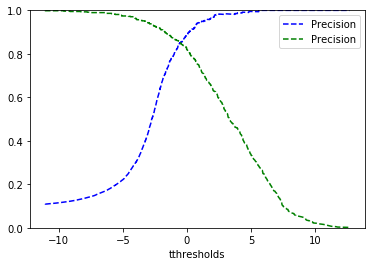

In [66]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g--",label="Precision")
plt.xlabel("tthresholds")
plt.legend(loc="upper-left")
plt.ylim([0,1])
plt.show()

In [ ]:
#try diffrent models on this data